In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import os 

In [2]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA14\week8")

In [3]:
os.listdir()

['bank.xlsx',
 'bankloan.sas7bdat',
 'bank_xgb.csv',
 'Corr.csv',
 'drive-download-20210812T061247Z-001.zip',
 'imp_features.csv',
 'Ks_value_profilling.xlsx',
 'TaxiFarePrediction',
 'TaxiFarePrediction.zip',
 'test_profile.xlsx',
 'train_profile.xlsx',
 'Tree Tutorial text.ipynb',
 'X_train.xlsx']

In [4]:
banks=pd.read_excel('bank.xlsx', sheet_name="bank")

In [5]:
banks.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
banks.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [8]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<AxesSubplot:>

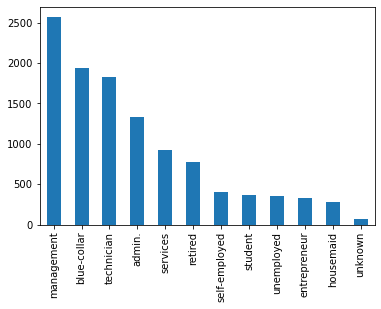

In [9]:
banks["job"].value_counts().plot(kind="bar")

In [10]:
banks["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [11]:
banks.shape

(11162, 17)

In [12]:
banks["job"].nunique()

12

In [13]:
banks["job"]=banks["job"].replace(["management", "admin."], "White-collar")
banks["job"]=banks["job"].replace(["services", "housemaid"], "Pink-collar")
banks["job"]=banks["job"].replace(["retired", "student", "unemployed", "unknown"], "Others")
banks["job"]=banks["job"].replace(["self-employed", "entrepreneur"], "self-depend")

In [14]:
banks["job"].value_counts()

White-collar    3900
blue-collar     1944
technician      1823
Others          1565
Pink-collar     1197
self-depend      733
Name: job, dtype: int64

In [15]:
banks["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [16]:
banks["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [17]:
banks["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [18]:
banks["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [19]:
banks.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [20]:
fg

NameError: name 'fg' is not defined

In [ ]:
fg=pd.crosstab(banks["deposit"], banks["contact"])
from scipy import stats
stats.chi2_contingency(fg)

In [ ]:
If p is low ; null will go  (<0.05 )
if p is high ; null will fly 

Chi2 : Null Hypothesis : There is no relationship between Var 
      Alter Hypothesis : There is a relationship between Var

In [21]:
target : deposit
X var : contact
chi 2 test of independence 
Chi2 : Null Hypothesis : There is no relationship between Var 
      Alter Hypothesis : There is a relationship between Var

SyntaxError: invalid syntax (Temp/ipykernel_19628/2919604906.py, line 2)

In [22]:
fg=pd.crosstab(banks["deposit"], banks["job"])
from scipy import stats
stats.chi2_contingency(fg) 

(336.6516714597521,
 1.3075933158432943e-70,
 5,
 array([[ 823.44069163,  629.81374306, 2052.02472675, 1022.85540226,
          385.67541659,  959.19001971],
        [ 741.55930837,  567.18625694, 1847.97527325,  921.14459774,
          347.32458341,  863.80998029]]))

In [23]:
fg=pd.crosstab(banks["deposit"], banks["month"])
from scipy import stats
stats.chi2_contingency(fg) 

(1046.7745027840656,
 1.6420829584486923e-217,
 11,
 array([[ 485.645852  ,  799.23732306,   57.8776205 ,  408.3003046 ,
          180.9991041 ,  796.60652213,  642.96774772,  145.22021143,
         1485.87636624,  496.16905572,  206.25479305,  167.84509944],
        [ 437.354148  ,  719.76267694,   52.1223795 ,  367.6996954 ,
          163.0008959 ,  717.39347787,  579.03225228,  130.77978857,
         1338.12363376,  446.83094428,  185.74520695,  151.15490056]]))

In [24]:
fg=pd.crosstab(banks["deposit"], banks["poutcome"])
from scipy import stats
stats.chi2_contingency(fg) 

(1004.635780185333,
 1.7761850102620281e-217,
 3,
 array([[ 646.12470883,  282.54802007,  563.51755958, 4380.80971152],
        [ 581.87529117,  254.45197993,  507.48244042, 3945.19028848]]))

In [25]:
banks["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [26]:
banks["poutcome"]=banks["poutcome"].replace(["unknown", "other"], "others")

In [27]:
banks["poutcome"].value_counts()

others     8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [28]:
# banks["recent_pdays"]=1/banks["pdays"]

In [29]:
banks.loc[banks["pdays"]==-1,"pdays"]=9999

banks["recent_pdays"]=1/banks["pdays"]

banks.drop(columns=["pdays"], inplace=True)

In [30]:
banks

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,White-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,others,yes,0.000100
1,56,White-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,others,yes,0.000100
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,others,yes,0.000100
3,55,Pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,others,yes,0.000100
4,54,White-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,others,yes,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,others,no,0.000100
11158,39,Pink-collar,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,others,no,0.000100
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,others,no,0.000100
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,failure,no,0.005814


In [31]:
banks["deposit_cat"]=banks["deposit"].map({"yes":1, "no":0})
banks.drop(columns=["deposit"], inplace=True)
banks

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,recent_pdays,deposit_cat
0,59,White-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,others,0.000100,1
1,56,White-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,others,0.000100,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,others,0.000100,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,others,0.000100,1
4,54,White-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,others,0.000100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,others,0.000100,0
11158,39,Pink-collar,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,others,0.000100,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,others,0.000100,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,failure,0.005814,0


In [32]:
banks.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,recent_pdays,deposit_cat
0,59,White-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,others,0.0001,1
1,56,White-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,others,0.0001,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,others,0.0001,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,others,0.0001,1
4,54,White-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,others,0.0001,1


<AxesSubplot:xlabel='age', ylabel='balance'>

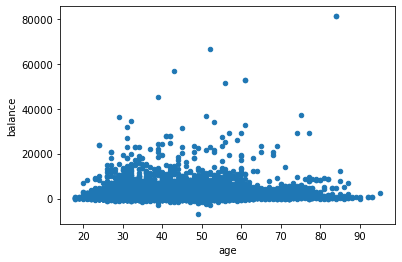

In [33]:
banks.plot(kind="scatter",x='age', y="balance") 

<AxesSubplot:xlabel='age', ylabel='duration'>

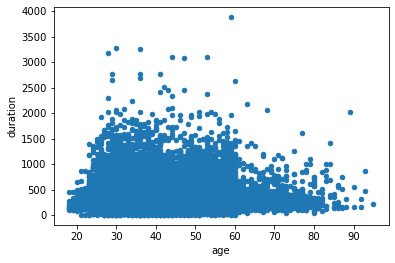

In [34]:
banks.plot(kind="scatter",x='age', y="duration") 

In [35]:
banks.dtypes[banks.dtypes=="object"]

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
dtype: object

In [36]:
bank1=pd.get_dummies(banks, columns=["job", "marital","education", "default", "housing","loan", "poutcome", "contact","month"],
              drop_first=True)

In [37]:
# final_data=pd.conact([num, dummy], axis=1)

In [38]:
banks.shape

(11162, 17)

In [39]:
bank1.shape 

(11162, 36)

In [40]:
bank1.dtypes

age                      int64
balance                  int64
day                      int64
duration                 int64
campaign                 int64
previous                 int64
recent_pdays           float64
deposit_cat              int64
job_Pink-collar          uint8
job_White-collar         uint8
job_blue-collar          uint8
job_self-depend          uint8
job_technician           uint8
marital_married          uint8
marital_single           uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
default_yes              uint8
housing_yes              uint8
loan_yes                 uint8
poutcome_others          uint8
poutcome_success         uint8
contact_telephone        uint8
contact_unknown          uint8
month_aug                uint8
month_dec                uint8
month_feb                uint8
month_jan                uint8
month_jul                uint8
month_jun                uint8
month_mar                uint8
month_ma

In [41]:
bank1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'recent_pdays', 'deposit_cat', 'job_Pink-collar', 'job_White-collar',
       'job_blue-collar', 'job_self-depend', 'job_technician',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'poutcome_others', 'poutcome_success', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [42]:
import seaborn as sns

In [43]:
cr[cr>.3]

NameError: name 'cr' is not defined

<AxesSubplot:>

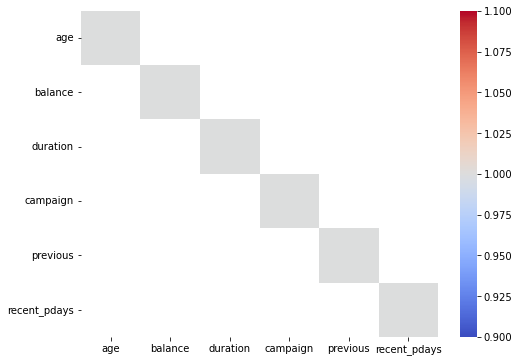

In [44]:
cr=bank1[['age','balance', 'duration', 'campaign', 'previous', 'recent_pdays']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cr[cr>.3], cmap="coolwarm")

In [45]:
# bank1.to_csv(r"D:\Training\Imarticus\PGA\PGA16W\week15\bank_xgb.csv")  

In [46]:
# cr.to_csv("D:\Training\Imarticus\PGA\PGA16W\week15\corr.csv")

In [47]:
X=bank1.drop(columns=["deposit_cat"])
y=bank1["deposit_cat"]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [49]:
# X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=88)

In [50]:
dt1=DecisionTreeClassifier(random_state=88)
dt1.fit(X, y)

DecisionTreeClassifier(random_state=88)

In [51]:
X=bank1.drop(columns=["deposit_cat"])
y=bank1["deposit_cat"]
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(random_state=88)
dt1.fit(X, y) 
pd.DataFrame({"Features": X.columns, "Imp": dt1.feature_importances_}).sort_values(by=["Imp"], ascending=False)

,Features,Imp
3,duration,0.350973
2,day,0.082497
1,balance,0.074139
21,poutcome_success,0.072011
0,age,0.066911
23,contact_unknown,0.062651
18,housing_yes,0.034377
6,recent_pdays,0.029326
4,campaign,0.023870
30,month_mar,0.020258


In [52]:
print("Train score :", dt1.score(X_train, y_train))
print("Test score :", dt1.score(X_test, y_test))

NameError: name 'X_train' is not defined

In [53]:
dt2=DecisionTreeClassifier(max_depth=15, random_state=88)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

NameError: name 'X_train' is not defined

In [54]:
dt2=DecisionTreeClassifier(min_samples_leaf=50, random_state=88)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

NameError: name 'X_train' is not defined

In [55]:
dt2=DecisionTreeClassifier(min_samples_split=120, random_state=88)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8512711389853287
Test score : 0.8356471115091805


In [56]:
help(dt2)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_

In [57]:
# max_depth, min_sample_split, min_sample_leaf, 

In [58]:
# - criterion='gini',/ "entropy"
# splitter='best',
# - max_depth=None,
# - min_samples_split=2, 
# - min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0,
# max_features=None, 
# - random_state=None, 
# max_leaf_nodes=None, 
# min_impurity_decrease=0.0, 
# min_impurity_split=None,
# class_weight=None, 
# presort='deprecated', 
# ccp_alpha=0.0

In [59]:
# 1'0 10%
# 0's 90%

In [60]:
# help(dt1)

In [61]:
dt2=DecisionTreeClassifier(max_depth=9)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8658304401388733
Test score : 0.8343036274070756


In [62]:
dt2=DecisionTreeClassifier(min_samples_leaf=15)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8713181767275171
Test score : 0.8463949843260188


In [63]:
dt2=DecisionTreeClassifier(min_samples_split=100)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.858326800313585
Test score : 0.8334079713390058


In [64]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=100, min_samples_leaf=15)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8359278754619778
Test score : 0.8347514554411106


In [57]:
X_train , X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=0)

In [59]:
dt2=DecisionTreeClassifier()
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 1.0
Test score : 0.7918781725888325


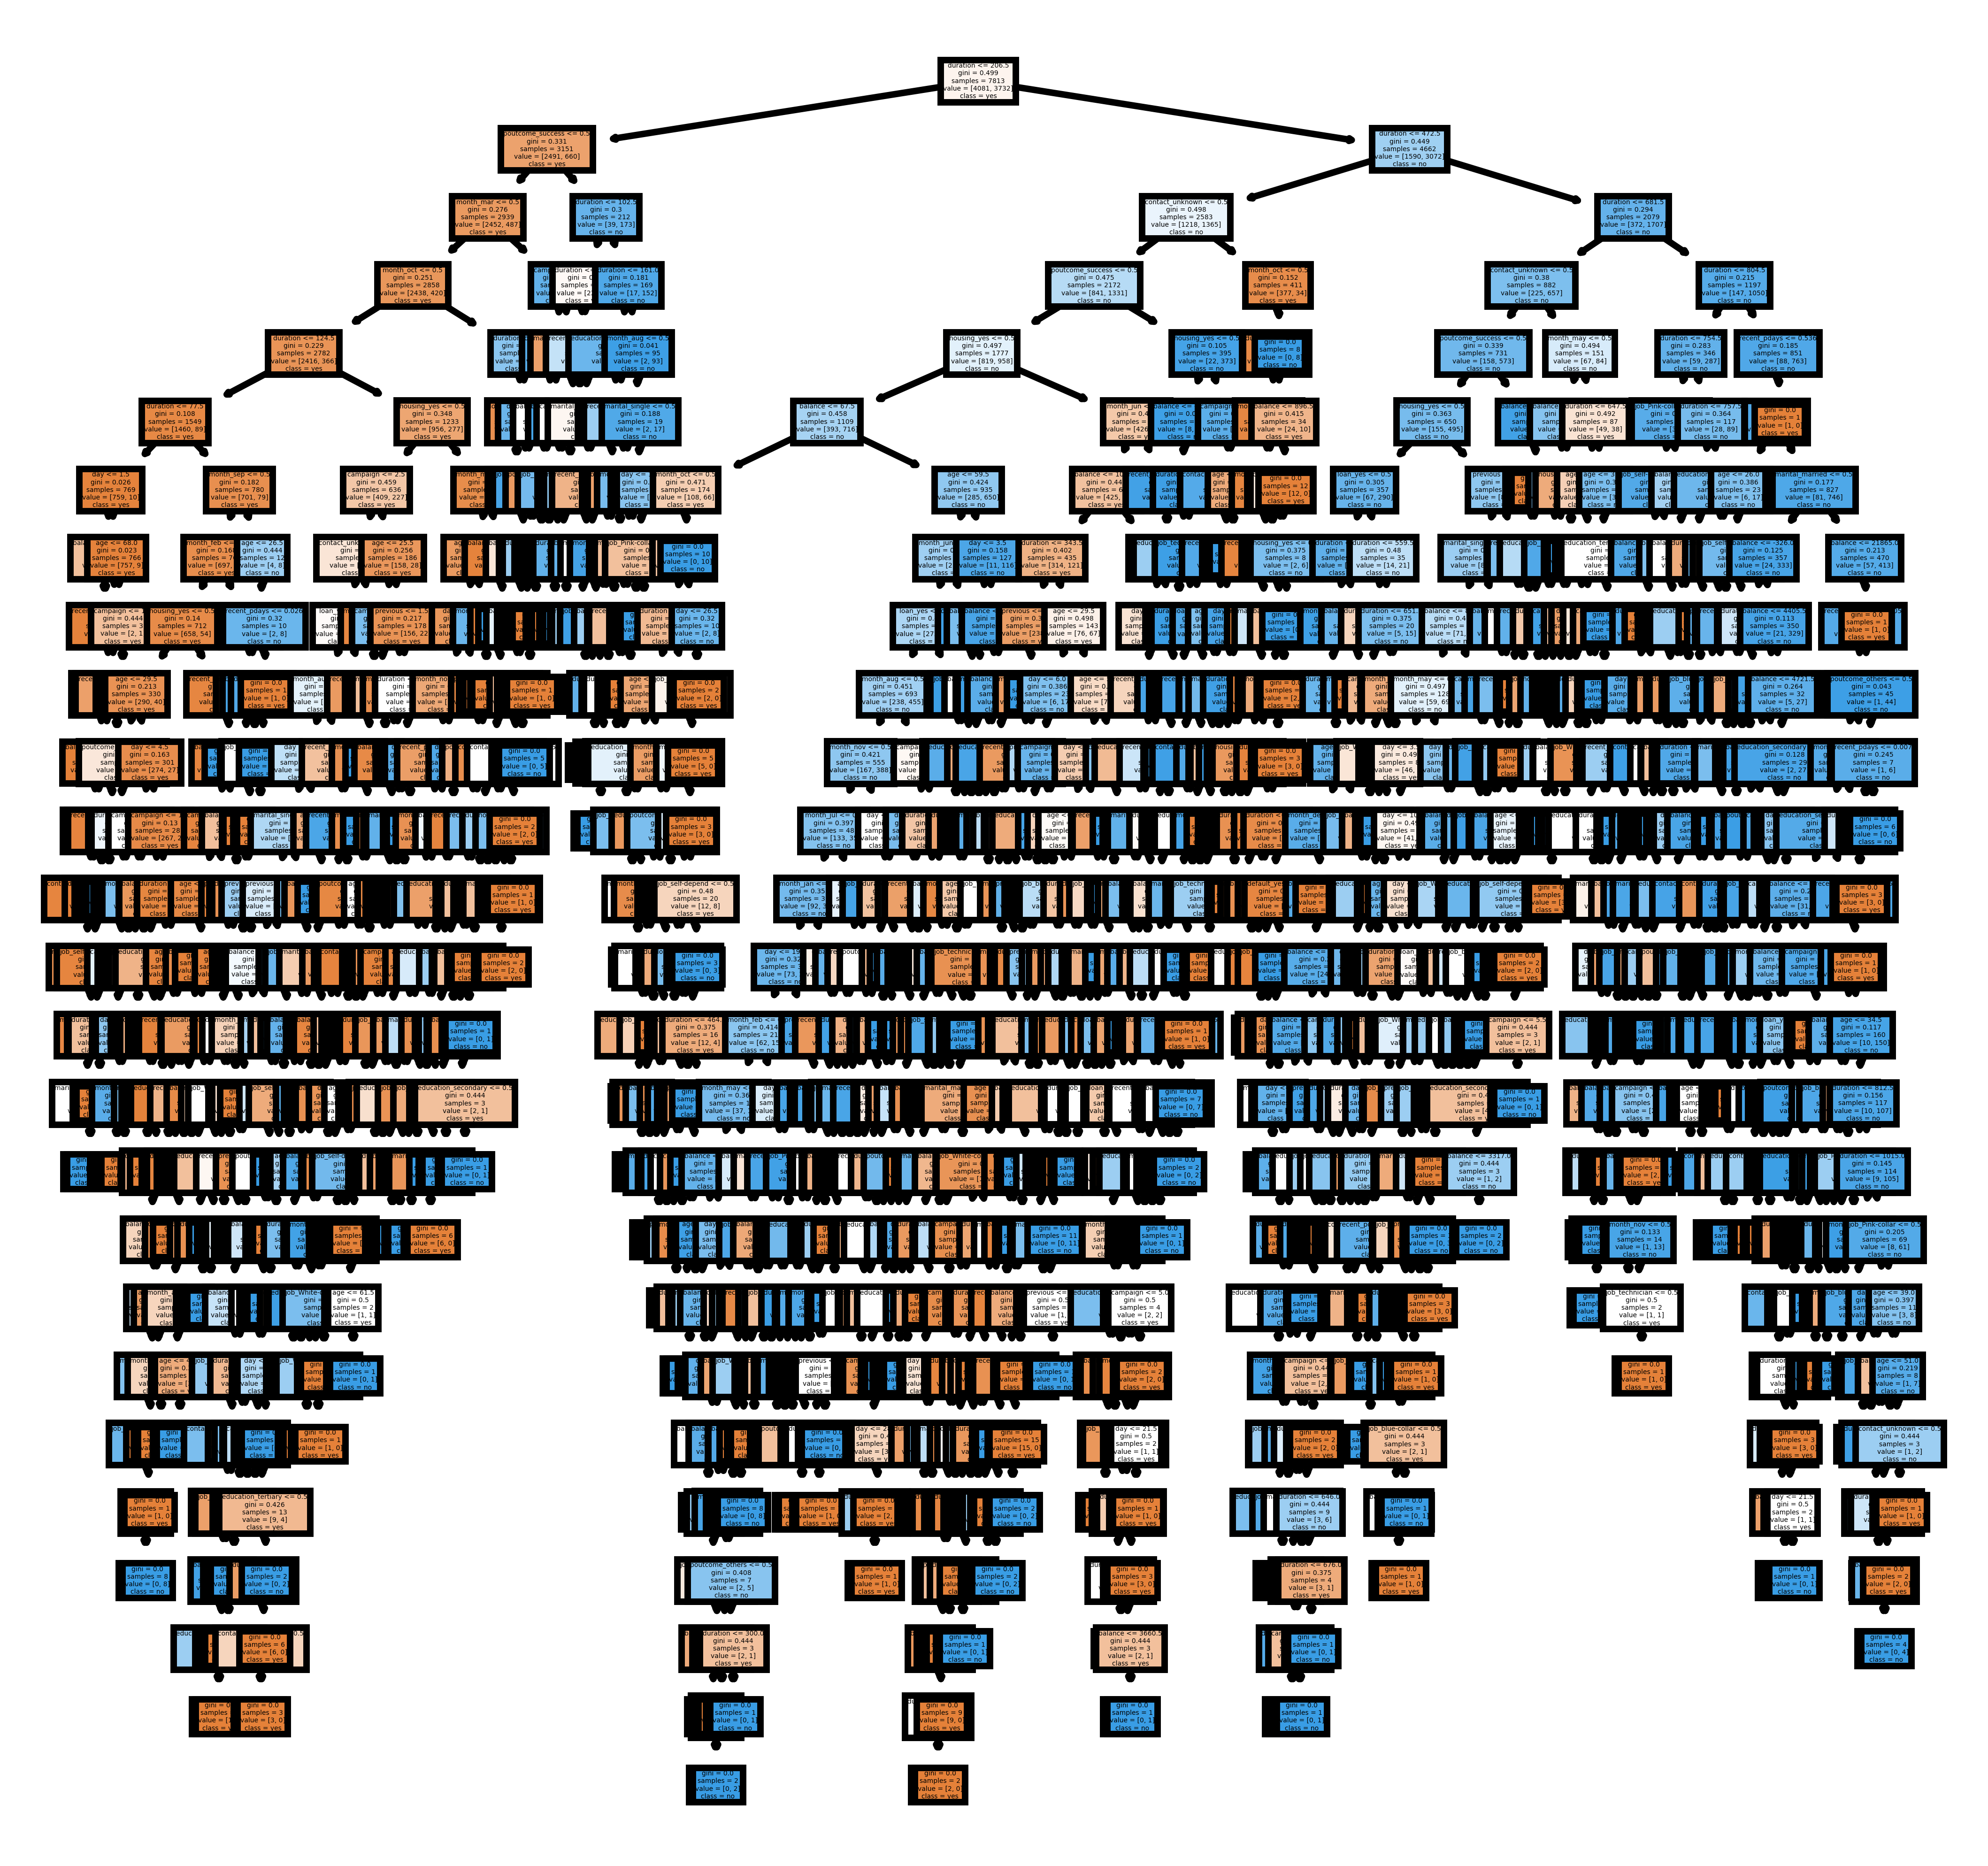

In [60]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)

dt_plot=plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [90]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=200, min_samples_leaf=150)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8019966722129783
Test score : 0.8029262466407883


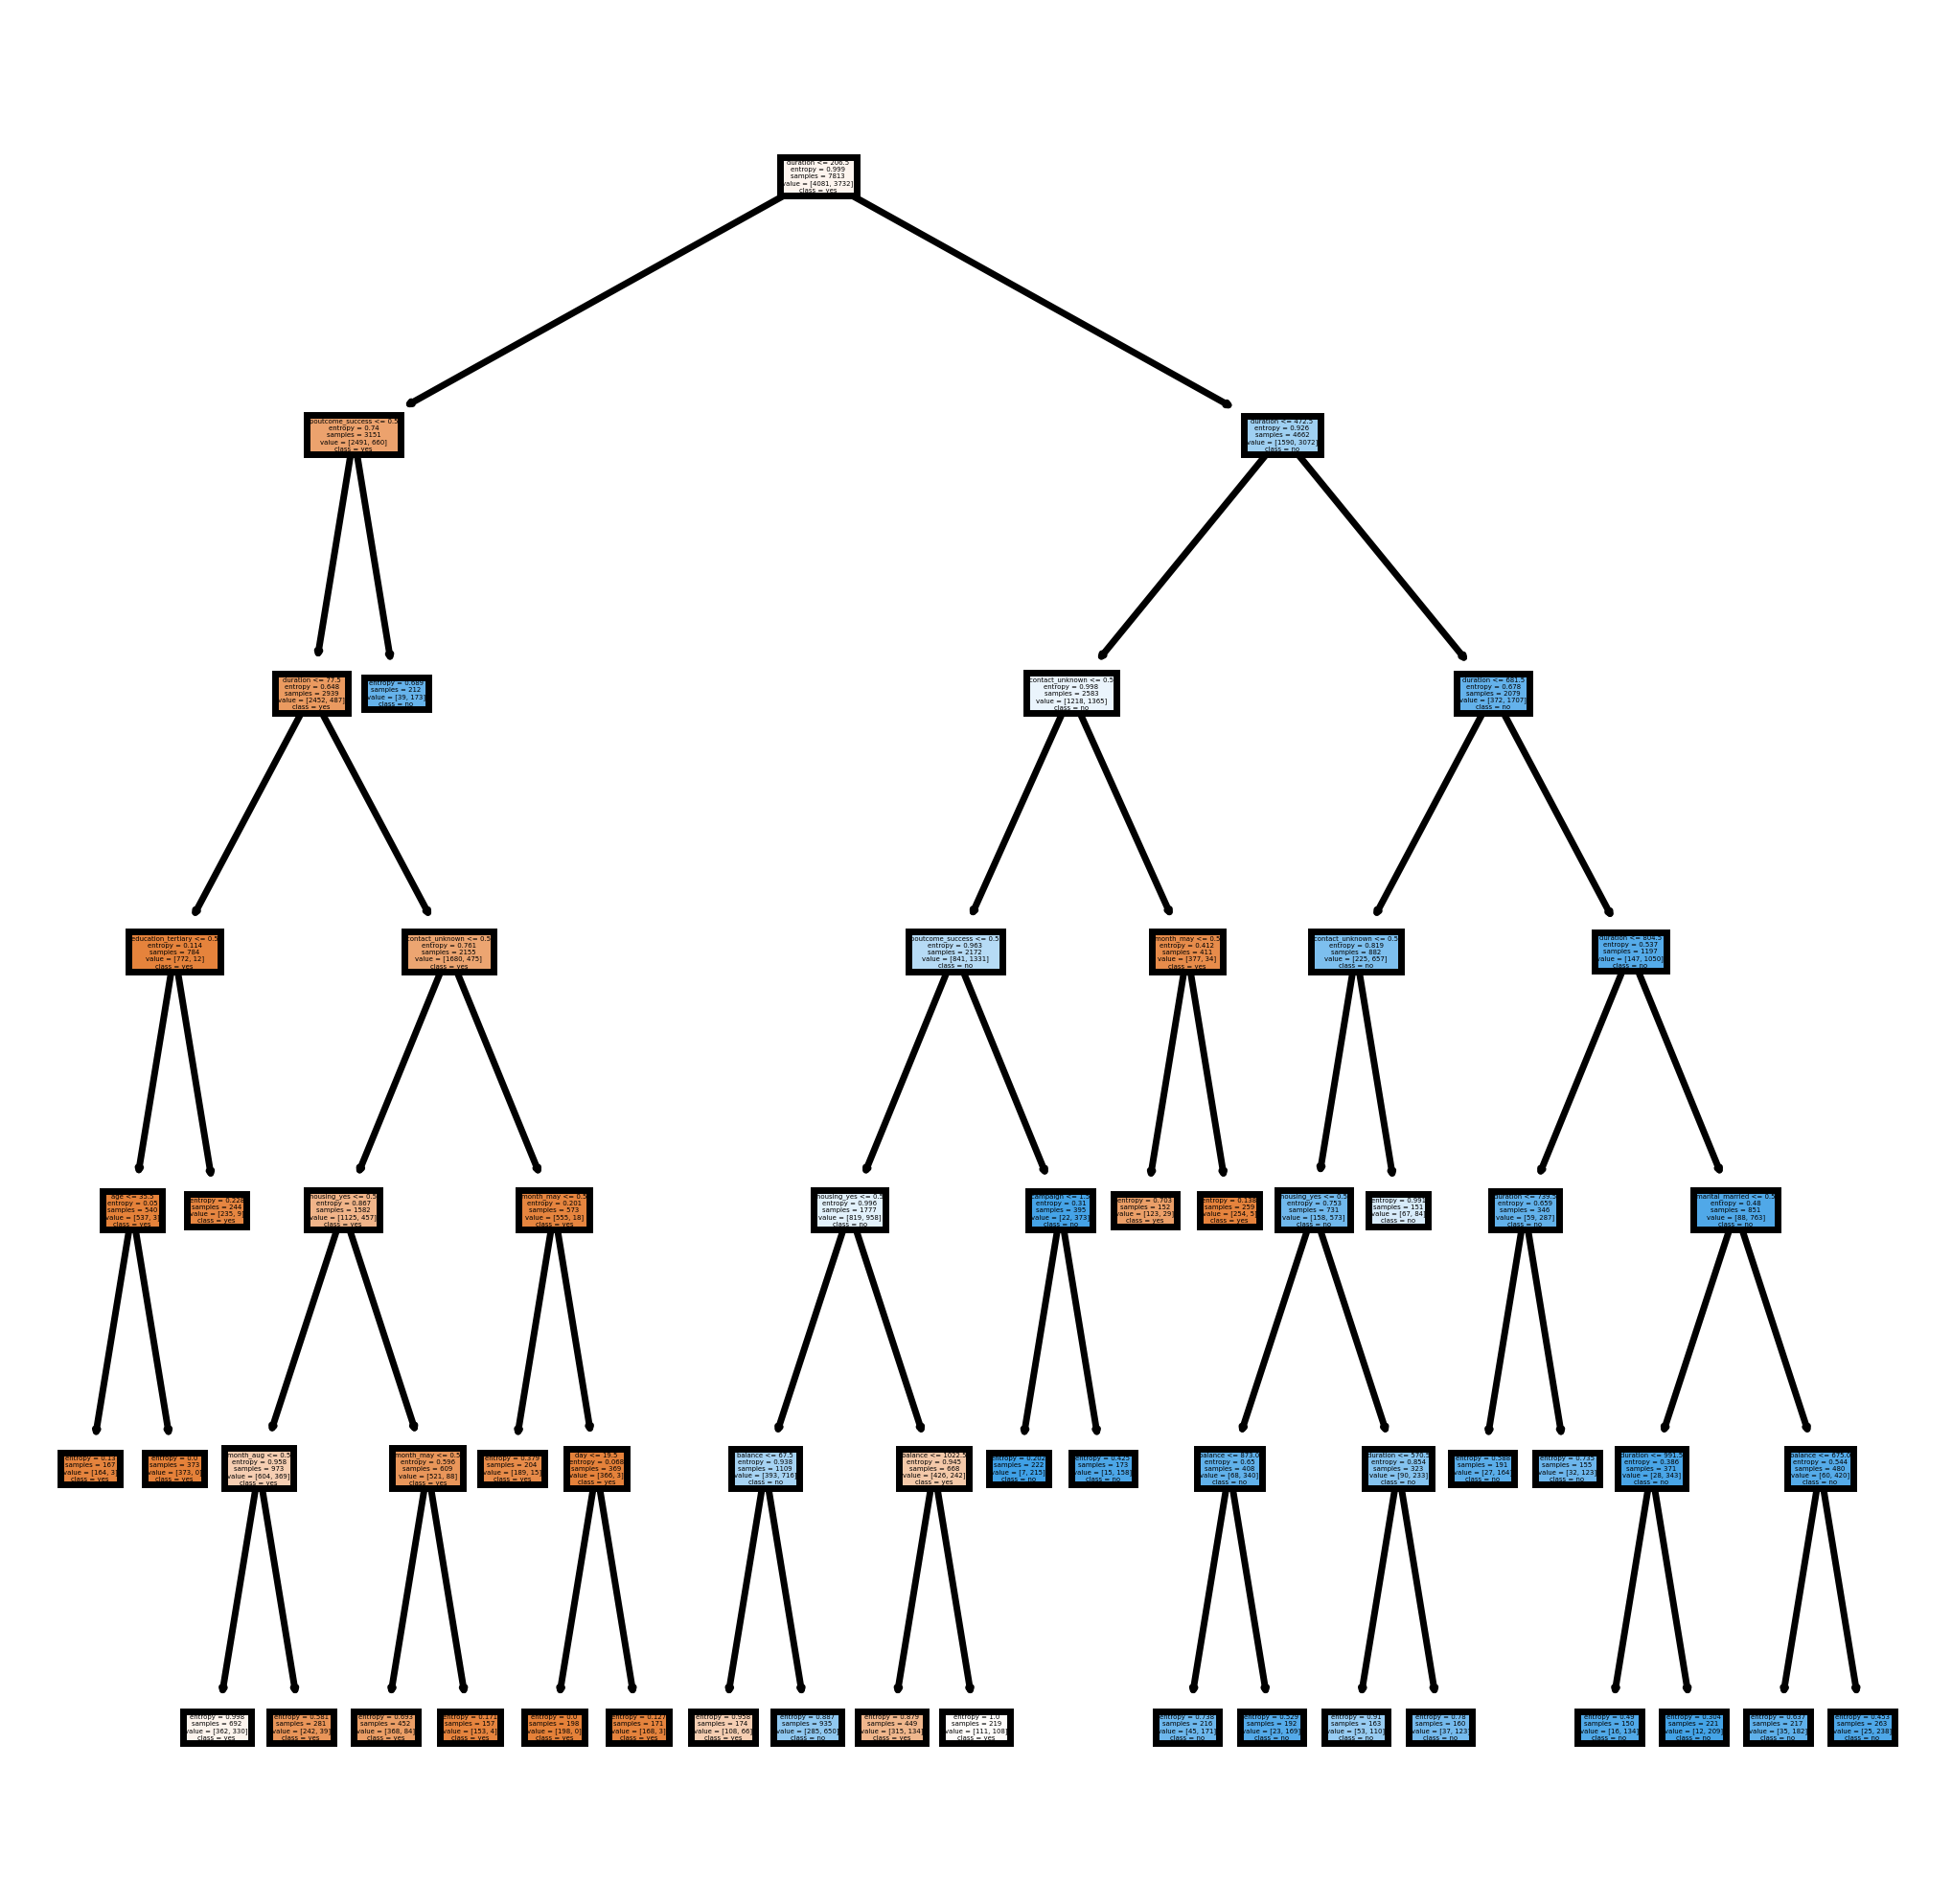

In [91]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [72]:
rules=tree.export_text(dt1, feature_names=X_train.columns.to_list())
print(rules)

|--- duration <= 206.50
|   |--- poutcome_success <= 0.50
|   |   |--- month_mar <= 0.50
|   |   |   |--- duration <= 123.50
|   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |--- housing_yes <= 0.50
|   |   |   |   |   |   |   |   |--- day <= 6.00
|   |   |   |   |   |   |   |   |   |--- job_Pink-collar <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |   |--- job_Pink-collar >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |--- day >  6.00
|   |   |   |   |   |   |   |   |   |--- duration <= 82.50
|   |   |   |   |   |   |   |   |   |   |--- month_nov <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |   |   |--- month_nov >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |   |--- 

In [69]:
# duration <= 363.50 & poutcome_success <= 0.50 & duration <= 139.50 & month_mar <= 0.50 & month_oct <= 0.50 & month_feb <= 0.50 & age <= 27.50 & housing_yes <= 0.50 &duration <= 78.50 &month_nov <= 0.50 :class: 0  
# duration <= 363.50 & poutcome_success <= 0.50 & duration <= 139.50 & month_mar <= 0.50 & month_oct <= 0.50 & month_feb <= 0.50 & age <= 27.50 & housing_yes <= 0.50 &duration <= 78.50 &month_nov > 0.50 :class: 1  

In [70]:
# print(rules)

In [71]:
dt1=DecisionTreeClassifier(max_depth=5)
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.798521670959794
Test accuracy: 0.8110165696372593


In [72]:
dt1=DecisionTreeClassifier(max_depth=11, criterion="entropy")
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.8834135961473849
Test accuracy: 0.8275862068965517


In [73]:
# Grid Search Method 

In [74]:
%timeit
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[10,50,100,150], 
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[10,50,100, 150,200]
             }

tr = DecisionTreeClassifier(random_state=88)

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=True, n_jobs=-1)

gsearch.fit(X_train, y_train) 

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=88),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [10, 50, 100, 150, 200],
                         'min_samples_split': [10, 50, 100, 150]},
             verbose=True)

In [75]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

In [76]:
gsearch.best_score_

0.829432582266658

In [77]:
dt3=DecisionTreeClassifier(max_depth=12, criterion="gini", 
                           min_samples_split=50,
                          min_samples_leaf= 10)
dt3.fit(X_train, y_train)

print("Train accuracy:", dt3.score(X_train,y_train))

print("Test accuracy:", dt3.score(X_test,y_test))

Train accuracy: 0.8601187143017135
Test accuracy: 0.8535602328705777


In [78]:
X_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'recent_pdays', 'job_Pink-collar', 'job_White-collar',
       'job_blue-collar', 'job_self-depend', 'job_technician',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'poutcome_others', 'poutcome_success', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [79]:
dt3.feature_importances_

array([0.02377707, 0.03011716, 0.04331838, 0.43120971, 0.01092041,
       0.00755841, 0.01708653, 0.        , 0.00086261, 0.        ,
       0.00126258, 0.00126427, 0.00425786, 0.        , 0.0014632 ,
       0.000486  , 0.00051036, 0.        , 0.04297752, 0.00386178,
       0.        , 0.16290888, 0.        , 0.0908716 , 0.01557785,
       0.        , 0.01229106, 0.00860072, 0.01457982, 0.01580758,
       0.02244346, 0.0079237 , 0.00967646, 0.01175263, 0.0066324 ])

In [93]:
imp=pd.DataFrame({"Var":X_train.columns, "Imp":dt2.feature_importances_}).sort_values(by=["Imp"], ascending=False)
imp

,Var,Imp
3,duration,0.551851
23,contact_unknown,0.158078
21,poutcome_success,0.155568
18,housing_yes,0.059577
24,month_aug,0.024930
1,balance,0.022179
31,month_may,0.020162
15,education_tertiary,0.002304
0,age,0.001644
12,marital_married,0.001322


In [132]:
imp.to_excel(r"D:\Training\Imarticus\PGA\PGA16W\week15\FeatImp.xlsx")

In [69]:
# imp_feat.to_csv("imp_features.csv")

In [133]:
X_train1=X_train[['duration','poutcome_success','contact_unknown','day','housing_yes','balance','age','month_mar','recent_pdays','month_jun','month_aug']]
X_test1=X_test[['duration','poutcome_success','contact_unknown','day','housing_yes','balance','age','month_mar','recent_pdays','month_jun','month_aug']]

In [134]:
dt3=DecisionTreeClassifier(max_depth=12, criterion="gini", 
                           min_samples_split=50,
                          min_samples_leaf= 10)
dt3.fit(X_train1, y_train)

print("Train accuracy:", dt3.score(X_train1,y_train))

print("Test accuracy:", dt3.score(X_test1,y_test))

Train accuracy: 0.8383917571956546
Test accuracy: 0.8289296909986565


In [72]:
def classification_evaluation(model, x, y):
    x1=x.copy()
    y1=y.copy()
    
    
    

In [74]:
# Train accuracy: 0.8198006495688207
# Test accuracy: 0.8145991939095387

### Evalution of model

In [75]:
pred_train=dt4.predict(X_train1)   # Classes , (1,0)
pred_test=dt4.predict(X_test1)

In [76]:
pred_test

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [77]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4705
           1       0.82      0.80      0.81      4224

    accuracy                           0.82      8929
   macro avg       0.82      0.82      0.82      8929
weighted avg       0.82      0.82      0.82      8929



In [78]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1168
           1       0.82      0.79      0.80      1065

    accuracy                           0.82      2233
   macro avg       0.82      0.81      0.81      2233
weighted avg       0.82      0.82      0.82      2233



In [ ]:
probs=dt4.predict_proba(X_train1)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
metrics.roc_auc_score(y_train,probs) 

In [170]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [172]:
# p_train=profile_decile(X_train,y_train,dt3)

In [65]:
p_test=profile_decile(X_test,y_test,dt3)

## RandomForest

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=88)

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf1=RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
print("Train score ", rf1.score(X_train, y_train))
print("Test Score", rf1.score(X_test, y_test))

Train score  1.0
Test Score 0.8723690103000448


In [86]:
help(rf1)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [89]:
import time 
st=time.time()
rf2=RandomForestClassifier(n_estimators=50, random_state=88, max_depth=8)
rf2.fit(X_train, y_train)
print("Train score ", rf2.score(X_train, y_train))
print("Test Score", rf2.score(X_test, y_test))
et=time.time()

print("total time", et-st)

Train score  0.8558629185799081
Test Score 0.8504254366323332
total time 0.3988618850708008


In [93]:
import time 
st=time.time()
rf2=RandomForestClassifier(n_estimators=200, random_state=88, max_depth=10)
rf2.fit(X_train, y_train)
print("Train score ", rf2.score(X_train, y_train))
print("Test Score", rf2.score(X_test, y_test))
et=time.time()

print("total time", et-st)

Train score  0.8789338111770635
Test Score 0.8566950291088222
total time 1.7622010707855225


In [ ]:
# n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
# warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

### Hyperparameter tuning

In [98]:
np.log(len(X.columns))

3.5553480614894135

In [99]:
np.sqrt(len(X.columns))

5.916079783099616

In [94]:
?GridSearchCV

In [102]:
from sklearn.model_selection import GridSearchCV

parameters={"n_estimators" : [100, 150],
            "criterion": ["gini", "entropy"],
            "max_depth" :[7,9,11,12],
#             "min_samples_split":[4,6,10],
#             "min_samples_leaf" :[4,6,10],
#             "max_features" :["log", "sqrt"],
            "bootstrap" : [True, False]
           }
rf=RandomForestClassifier(random_state=88)

rf_gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring="accuracy", verbose=10, n_jobs=-1, cv=5)
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=88), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11, 12],
                         'n_estimators': [100, 150]},
             scoring='accuracy', verbose=10)

In [103]:
rf_gs.best_params_ 

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 12,
 'n_estimators': 150}

In [104]:
import time 
st=time.time()
rf3=RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=10, max_features="sqrt", bootstrap=True)
rf3.fit(X_train, y_train)
print("Train score ", rf3.score(X_train, y_train))
print("Test Score", rf3.score(X_test, y_test))
et=time.time()
print("total time", et-st)

Train score  0.8806137305409341
Test Score 0.8580385132109271
total time 1.926393985748291


array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [106]:
# AUc, ROC, Recall, Precision, F1Score  etc 

In [ ]:
p Prob Score 

In [ ]:
rf3.predict()
rf3.predict_proba()

In [94]:
4*2*5*4*4*2*2*10

25600

In [98]:
((25600*.81)/60)/60

5.760000000000001